In [ ]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-mrjbf971
  Running command git clone --filter=blob:none --quiet https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-mrjbf971
  Resolved https://www.github.com/keras-team/keras-contrib.git to commit 3fc5ef709e061416f4bc8a92ca3750c824b5d2b0
  Preparing metadata (setup.py) ... done
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-py3-none-any.whl size=101078 sha256=6225113aef1a414e3df8121c7749fe1c706e523c2e5c3d3b87095e375ef3bf4c
  Stored in directory: /tmp/pip-ephem-wheel-cache-b1somike/wheels/83/b3/99/125cd08d3e8224b434b1b4badd6f8b2651e0251b7e8f983e60
Successfully built keras-contrib


In [ ]:
import zipfile
import os
import numpy as np
import shutil
from matplotlib import pyplot as plt
from random import sample
from random import random
from numpy.random import randint
from keras.models import load_model
from keras.optimizers import Adam
from keras.initializers import RandomNormal
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Activation
from keras.layers import Concatenate
from keras.layers import Flatten
from keras.layers import Dense
from keras_contrib.layers.normalization.instancenormalization import InstanceNormalization

In [ ]:
#Setting random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)

In [ ]:
!curl -O http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/anime.zip
print('anime dataset downloaded to working directory')
!curl -O http://homepages.cs.ncl.ac.uk/stephen.mcgough/Teaching/PubFig.zip

  0  175M    0  983k    0     0   198k      0  0:15:05  0:00:04  0:15:01  198k^C


In [ ]:
## Unzipping anime.zip
with zipfile.ZipFile('anime.zip', 'r') as zip_ref:
    zip_ref.extractall()
print('Anime faces dataset extracted to working directory as "images/"')

## Unzipping PubFig.zip
with zipfile.ZipFile('PubFig.zip', 'r') as zip_ref:
    zip_ref.extractall()
print('Public figure faces dataset extracted to working directory as "CelebDataProcessed/"\n')

Anime faces dataset extracted to working directory as "images/"
Public figure faces dataset extracted to working directory as "CelebDataProcessed/"



In [ ]:
for root, dirs, files in os.walk('Celeb/'):
    for name in files:
        newname = str(np.random.choice(range(1,17000))) + name
        os.rename(os.path.join(root,name), os.path.join(root,newname))

## moving all images out of labelled subdirectory and into the main folder
folder = r"Celeb/" #defining folder to search
subfolders = [f.path for f in os.scandir(folder) if f.is_dir()] #defining subfolders
#looping through folders to move images
for sub in subfolders:
    for f in os.listdir(sub):
        src = os.path.join(sub, f)
        dst = os.path.join(folder, f)
        shutil.move(src, dst)

#deleting empty folders
path_abs=('Celeb/') #defining path for empty folders
walk = list(os.walk(path_abs))
for path, _, _ in walk[::-1]:
    if len(os.listdir(path)) == 0:
        os.rmdir(path)

In [ ]:
celeb_image_count = len(os.listdir('Celeb/'))
anime_image_count = len(os.listdir('img/'))
print(f'There are {celeb_image_count} images of celebrity faces (source)')
print(f'There are {anime_image_count} images of anime faces (target)')

There are 196 images of celebrity faces (source)
There are 586 images of anime faces (target)


In [ ]:
image_size_source = (64,64)
image_size_target = (100,100)

def numpy_arrayify(desired_filename,filepath_source, filepath_target):
  #processing source images
  source_list = list()
  for filename in os.listdir(filepath_source):
    pic = load_img(filepath_source + filename, target_size=image_size_source)
    pic = img_to_array(pic)
    pic = pic.astype('float32')
    source_list.append(pic)
  source_list = np.asarray(source_list)
# processing target images
  target_list = list()
  for filename in os.listdir(filepath_target):
    pic2 = load_img(filepath_target + filename, target_size=image_size_target)
    pic2 = img_to_array(pic2)
    pic2 = pic2.astype('float32')
    target_list.append(pic2)
  target_list = np.asarray(target_list)
#crop anime faces to 64x64 and similar face size to celeb
  target_list = target_list[:, 26:90, 18:82, :]
# saving as zipped numpy file
  np.savez_compressed(desired_filename, source_list, target_list)

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
numpy_arrayify('celeb_anime.npz','Celeb/','img/')
print('------------------------------------------------------')
print('numpy arrays of images saved to environment as celeb_anime.npz')
print('------------------------------------------------------')

------------------------------------------------------
numpy arrays of images saved to environment as celeb_anime.npz
------------------------------------------------------


In [ ]:
#loading zipped file
data = np.load('celeb_anime.npz')
#assigning numpy arrays
celeb, anime = data['arr_0'], data['arr_1']

print('---------------------------------------')
print(f'Celeb data is shape: {celeb.shape}')
print('---------------------------------------')
print(f'Anime data is shape: {anime.shape}')
print('---------------------------------------')

---------------------------------------
Celeb data is shape: (196, 64, 64, 3)
---------------------------------------
Anime data is shape: (586, 64, 64, 3)
---------------------------------------


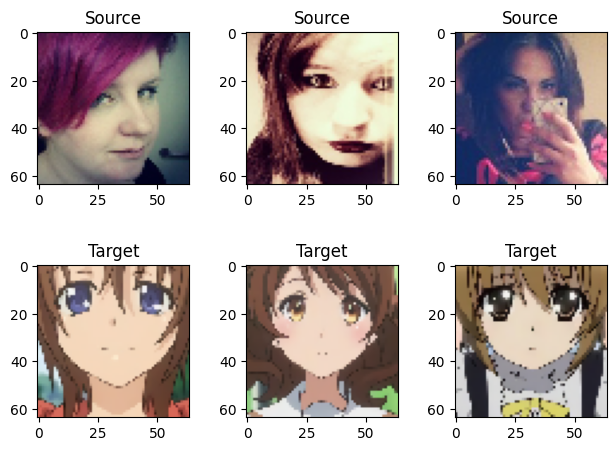

In [ ]:
fig, axs = plt.subplots(2, 3)
fig.tight_layout(pad=1.0)
for i in range(3):
  axs[0, i].imshow(celeb[i].astype('uint8'))
  axs[0, i].set_title('Source')
  axs[1, i].imshow(anime[i].astype('uint8'))
  axs[1, i].set_title('Target')

In [ ]:
!pip install Input

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for Input: filename=input-0.0.0-py3-none-any.whl size=943 sha256=0680e51d3fde4393ee22ac11091b14f5da7ad46e626363d991f79e34aaa46be1
  Stored in directory: /root/.cache/pip/wheels/0a/60/2b/b8b05f7461ab53e63e82521f24a4178bf4c758204637733e11
Successfully built Input


In [ ]:
from keras.layers import *

In [ ]:
def build_discriminator_sn(shape):
    model = Sequential()

    model.add(
        Conv2D(
            64, (3, 3), strides=(
                2, 2), padding="same", input_shape=shape))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(128, (3, 3), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(256, (3, 3), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))

    model.add(Conv2D(512, (3, 3), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))

    #model.add(Conv2D(1, (3, 3), padding="same"))
    model.add(Flatten())
    # model.add(GlobalAveragePooling2D())
    model.add(Dense(1))
    # model.add(Activation('sigmoid'))

    # compile model
    model.compile(loss='mse', optimizer=Adam(lr=0.0001, beta_1=0.5), loss_weights=[0.5])

    return model
 
# generator a resnet block
def resnet_block(n_filters, input_layer):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# first layer convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(input_layer)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# second convolutional layer
	g = Conv2D(n_filters, (3,3), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	# concatenate merge channel-wise with input layer
	g = Concatenate()([g, input_layer])
	return g
 
# define the standalone generator model
def define_generator(image_shape, n_resnet=9, filepath='NULL'):
	# weight initialization
	init = RandomNormal(stddev=0.02)
	# image input
	in_image = Input(shape=image_shape)
	# c7s1-64
	g = Conv2D(64, (7,7), padding='same', kernel_initializer=init)(in_image)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d128
	g = Conv2D(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# d256
	g = Conv2D(256, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# R256
	for _ in range(n_resnet):
		g = resnet_block(256, g)
	# u128
	g = Conv2DTranspose(128, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# u64
	g = Conv2DTranspose(64, (3,3), strides=(2,2), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	g = Activation('relu')(g)
	# c7s1-3
	g = Conv2D(3, (7,7), padding='same', kernel_initializer=init)(g)
	g = InstanceNormalization(axis=-1)(g)
	out_image = Activation('tanh')(g)
	# define model
	model = Model(in_image, out_image)
	if filepath != 'NULL':
		model.load_weights(filepath)
	return model
 
# define a composite model for updating generators by adversarial and cycle loss
def define_composite_model(g_model_1, d_model, g_model_2, image_shape, filepath='NULL'):
	# ensure the model we're updating is trainable
	g_model_1.trainable = True
	# mark discriminator as not trainable
	d_model.trainable = False
	# mark other generator model as not trainable
	g_model_2.trainable = False
	# discriminator element
	input_gen = Input(shape=image_shape)
	gen1_out = g_model_1(input_gen)
	output_d = d_model(gen1_out)
	# identity element
	input_id = Input(shape=image_shape)
	output_id = g_model_1(input_id)
	# forward cycle
	output_f = g_model_2(gen1_out)
	# backward cycle
	gen2_out = g_model_2(input_id)
	output_b = g_model_1(gen2_out)
	# define model graph
	model = Model([input_gen, input_id], [output_d, output_id, output_f, output_b])
	# define optimization algorithm configuration
	opt = Adam(lr=0.0001, beta_1=0.5)
  ## loading in previous weights from crashed training run
	# compile model with weighting of least squares loss and L1 loss
	model.compile(loss=['mse', 'mae', 'mae', 'mae'], loss_weights=[1, 5, 10, 10], optimizer=opt)
	if filepath != 'NULL':
		model.load_weights(filepath)
	return model
 
# load and prepare training images
def load_real_samples(filename):
	# load the dataset
	data = np.load(filename)
	# unpack arrays
	X1, X2 = data['arr_0'], data['arr_1']
	# scale from [0,255] to [-1,1]
	X1 = (X1 - 127.5) / 127.5
	X2 = (X2 - 127.5) / 127.5
	return [X1, X2]
 
# select a batch of random samples, returns images and target
def generate_real_samples(dataset, n_samples, patch_shape):
	# choose random instances
	ix = randint(0, dataset.shape[0], n_samples)
	# retrieve selected images
	X = dataset[ix]
	# generate 'real' class labels (1)
	y = np.ones((n_samples, patch_shape, patch_shape, 1))
	return X, y
 
# generate a batch of images, returns images and targets
def generate_fake_samples(g_model, dataset, patch_shape):
	# generate fake instance
	X = g_model.predict(dataset)
	# create 'fake' class labels (0)
	y = np.zeros((len(X), patch_shape, patch_shape, 1))
	return X, y
 
# save the models to file
def save_weights(step, g_model_AtoB, g_model_BtoA, d_model_A, d_model_B, c_model_AtoB, c_model_BtoA):
	# save the first generator model
	filename1 = './g_model_AtoB_%06d.h5' % (step+1)
	g_model_AtoB.save_weights(filename1)
	# save the second generator model
	filename2 = './g_model_BtoA_%06d.h5' % (step+1)
	g_model_BtoA.save_weights(filename2)
 # save the first generator model
	filename1 = './d_model_A_%06d.h5' % (step+1)
	d_model_A.save_weights(filename1)
	# save the second generator model
	filename2 = './d_model_B_%06d.h5' % (step+1)
	d_model_B.save_weights(filename2)
 # save the first generator model
	filename1 = './c_model_AtoB_%06d.h5' % (step+1)
	c_model_AtoB.save_weights(filename1)
	# save the second generator model
	filename2 = './c_model_BtoA_%06d.h5' % (step+1)
	c_model_BtoA.save_weights(filename2)
	print('>Saved: %s and %s' % (filename1, filename2))
 
# generate samples and save as a plot and save the model
def summarize_performance(step, g_model, trainX, name, n_samples=5):
	# select a sample of input images
	X_in, _ = generate_real_samples(trainX, n_samples, 0)
	# generate translated images
	X_out, _ = generate_fake_samples(g_model, X_in, 0)
	# scale all pixels from [-1,1] to [0,1]
	X_in = (X_in + 1) / 2.0
	X_out = (X_out + 1) / 2.0
	# plot real images
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + i)
		plt.axis('off')
		plt.imshow(X_in[i])
	# plot translated image
	for i in range(n_samples):
		plt.subplot(2, n_samples, 1 + n_samples + i)
		plt.axis('off')
		plt.imshow(X_out[i])
	# save plot to file
	filename1 = '/content/save/%s_generated_plot_%06d.png' % (name, (step+1))
	plt.savefig(filename1)
	plt.close()
 
# update image pool for fake images
def update_image_pool(pool, images, max_size=50):
	selected = list()
	for image in images:
		if len(pool) < max_size:
			# stock the pool
			pool.append(image)
			selected.append(image)
		elif random.random() < 0.5:
			# use image, but don't add it to the pool
			selected.append(image)
		else:
			# replace an existing image and use replaced image
			ix = randint(0, len(pool))
			selected.append(pool[ix])
			pool[ix] = image
	return np.asarray(selected)
 
# train cyclegan models
def train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset):
	# define properties of the training run
	n_epochs, n_batch, = 2, 1
	# determine the output square shape of the discriminator
	n_patch = d_model_A.output_shape[1]
	# unpack dataset
	trainA, trainB = dataset
	# prepare image pool for fakes
	poolA, poolB = list(), list()
	# calculate the number of batches per training epoch
	bat_per_epo = int(len(trainA) / n_batch)
	# calculate the number of training iterations
	n_steps = bat_per_epo * n_epochs
	# manually enumerate epochs
	for i in range(n_steps):
		# select a batch of real samples
		X_realA, y_realA = generate_real_samples(trainA, n_batch, n_patch)
		X_realB, y_realB = generate_real_samples(trainB, n_batch, n_patch)
		# generate a batch of fake samples
		X_fakeA, y_fakeA = generate_fake_samples(g_model_BtoA, X_realB, n_patch)
		X_fakeB, y_fakeB = generate_fake_samples(g_model_AtoB, X_realA, n_patch)
		# update fakes from pool
		X_fakeA = update_image_pool(poolA, X_fakeA)
		X_fakeB = update_image_pool(poolB, X_fakeB)
		# update generator B->A via adversarial and cycle loss
		g_loss2, _, _, _, _  = c_model_BtoA.train_on_batch([X_realB, X_realA], [y_realA, X_realA, X_realB, X_realA])
		# update discriminator for A -> [real/fake]
		dA_loss1 = d_model_A.train_on_batch(X_realA, y_realA)
		dA_loss2 = d_model_A.train_on_batch(X_fakeA, y_fakeA)
		# update generator A->B via adversarial and cycle loss
		g_loss1, _, _, _, _ = c_model_AtoB.train_on_batch([X_realA, X_realB], [y_realB, X_realB, X_realA, X_realB])
		# update discriminator for B -> [real/fake]
		dB_loss1 = d_model_B.train_on_batch(X_realB, y_realB)
		dB_loss2 = d_model_B.train_on_batch(X_fakeB, y_fakeB)
		# summarize performance
		print('>%d, dA[%.3f,%.3f] dB[%.3f,%.3f] g[%.3f,%.3f]' % (i+1, dA_loss1,dA_loss2, dB_loss1,dB_loss2, g_loss1,g_loss2))
		# evaluate the model performance every so often
		if (i+1) % 50 == 0:
			# plot A->B translation
			summarize_performance(i, g_model_AtoB, trainA, 'AtoB')
			# plot B->A translation
			summarize_performance(i, g_model_BtoA, trainB, 'BtoA')
		if (i+1) % 50 == 0:
			# save the models
			save_weights(i, g_model_AtoB, g_model_BtoA, d_model_A, d_model_B, c_model_AtoB, c_model_BtoA)

In [ ]:
dataset = load_real_samples('./celeb_anime.npz')
print('Loaded', dataset[0].shape, dataset[1].shape)
# define input shape based on the loaded dataset
image_shape = dataset[0].shape[1:]
# generator: A -> B
g_model_AtoB = define_generator(image_shape)
#g_model_AtoB.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/g_model_AtoB_029988.h5') #used to load weights from drive and continue training
# generator: B -> A
g_model_BtoA = define_generator(image_shape)
#g_model_BtoA.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/g_model_BtoA_029988.h5')
# discriminator: A -> [real/fake]
d_model_A = build_discriminator_sn(image_shape)
#d_model_A.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/d_model_A_029988.h5')
# discriminator: B -> [real/fake]
d_model_B = build_discriminator_sn(image_shape)
#d_model_A.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/d_model_B_029988.h5')
# composite: A -> B -> [real/fake, A]
c_model_AtoB = define_composite_model(g_model_AtoB, d_model_B, g_model_BtoA, image_shape)
#c_model_AtoB.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/c_model_AtoB_029988.h5')
# composite: B -> A -> [real/fake, B]
c_model_BtoA = define_composite_model(g_model_BtoA, d_model_A, g_model_AtoB, image_shape)
#c_model_BtoA.load_weights('/content/drive/MyDrive/COLAB3/Pass 4 weights/c_model_BtoA_029988.h5')

FileNotFoundError: ignored

In [ ]:
train(d_model_A, d_model_B, g_model_AtoB, g_model_BtoA, c_model_AtoB, c_model_BtoA, dataset)

1/1 [==============================] - 1s 895ms/step


>1, dA[0.577,0.002] dB[0.557,0.001] g[16.529,17.434]
1/1 [==============================] - 0s 21ms/step
>2, dA[0.394,0.005] dB[0.348,0.013] g[16.937,17.723]
1/1 [==============================] - 0s 20ms/step
>3, dA[0.339,0.019] dB[0.326,0.020] g[15.464,16.334]
1/1 [==============================] - 0s 25ms/step
>4, dA[0.168,0.047] dB[0.185,0.028] g[15.984,17.886]
1/1 [==============================] - 0s 24ms/step
>5, dA[0.242,0.050] dB[0.124,0.044] g[15.574,16.510]
1/1 [==============================] - 0s 21ms/step
>6, dA[0.086,0.080] dB[0.065,0.049] g[14.834,16.454]
1/1 [==============================] - 0s 21ms/step
>7, dA[0.171,0.093] dB[0.027,0.028] g[13.435,13.954]
1/1 [==============================] - 0s 20ms/step
>8, dA[0.130,0.108] dB[0.011,0.016] g[16.062,17.221]
1/1 [==============================] - 0s 20ms/step
>9, dA[0.051,0.110] dB[0.003,0.012] g[12.194,13.021]
1/1 [==============================] - 0s 20ms/step
>10, dA[0.085,0.088] dB[0.010,0.215] g[13.324,13.659]
1

In [ ]:
!gdown --id 14PgXAzfCCnvWsiR9_LBqta83mV928QDM

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14PgXAzfCCnvWsiR9_LBqta83mV928QDM
To: /content/g_model_AtoB_010004.h5
100% 141M/141M [00:01<00:00, 89.9MB/s]


In [ ]:
!gdown --id 14GIOGKmvFqYQN87WK27bGvd0AFvvVVDP

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=14GIOGKmvFqYQN87WK27bGvd0AFvvVVDP
To: /content/g_model_BtoA_010004.h5
100% 141M/141M [00:02<00:00, 57.5MB/s]


In [ ]:
image_shape = (64, 64, 3)
# loading test images
def load_image(filename, size=(64,64)):
	# load and resize the image
	pixels = load_img(filename, target_size=size)
	# convert to numpy array
	pixels = img_to_array(pixels)
	# transform in a sample
	pixels = np.expand_dims(pixels, 0)
	# scale from [0,255] to [-1,1]
	pixels = (pixels - 127.5) / 127.5
	return pixels

#utilising function above to load in test images
def generate_anime(filepath, direction='AB'):
  filepath_test = filepath
  test_list = list()
  for file in os.listdir(filepath_test):
    pic = os.fsdecode(file)
    pic = os.path.join(filepath_test, file)
    pic = load_image(pic)
    test_list.append(pic)

  # Loading weights and creating fake anime image based on test images
  cust = {'InstanceNormalization': InstanceNormalization}
  g_model_AtoB = define_generator(image_shape)
  g_model_BtoA = define_generator(image_shape)
  g_model_AtoB.load_weights('/content/g_model_AtoB_010004.h5')
  g_model_BtoA.load_weights('/content/g_model_BtoA_010004.h5')

  # translate image
  image_transAB = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transAB.append(g_model_AtoB.predict(test_list[i])) 
    # scale from [-1,1] to [0,1]
    image_transAB[i] = (image_transAB[i] + 1) / 2
    test_list[i] = (test_list[i] + 1) / 2

  image_transBA = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transBA.append(g_model_BtoA.predict(image_transAB[i])) 
    # scale from [-1,1] to [0,1]
    image_transBA[i] = (image_transBA[i] + 1) / 2
  
  if direction=='AB':
    #plotting resultsA-B
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax1 = fig.add_subplot(2,2,1)
      ax1.set_title('Source')
      ax1.imshow(test_list[i][0])
      ax2 = fig.add_subplot(2,2,2)
      ax2.set_title('Generated')
      ax2.imshow(image_transAB[i][0])

  else:
        #plotting results B-A
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax3 = fig.add_subplot(2,2,3)
      ax3.set_title('Source')
      ax3.imshow(image_transAB[i][0])
      ax4 = fig.add_subplot(2,2,4)
      ax4.set_title('Generated')
      ax4.imshow(image_transBA[i][0])

  plt.show()

#utilising function above to load in test images
def generate_human(filepath, direction='AB'):
  filepath_test = filepath
  test_list = list()
  for file in os.listdir(filepath_test):
    pic = os.fsdecode(file)
    pic = os.path.join(filepath_test, file)
    pic = load_image(pic)
    test_list.append(pic)

  # Loading weights and creating fake anime image based on test images
  cust = {'InstanceNormalization': InstanceNormalization}
  g_model_AtoB = define_generator(image_shape)
  g_model_BtoA = define_generator(image_shape)
  g_model_AtoB.load_weights('/content/g_model_BtoA_010004.h5')
  g_model_BtoA.load_weights('/content/g_model_AtoB_010004.h5')

  # translate image
  image_transAB = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transAB.append(g_model_AtoB.predict(test_list[i])) 
    # scale from [-1,1] to [0,1]
    image_transAB[i] = (image_transAB[i] + 1) / 2
    test_list[i] = (test_list[i] + 1) / 2

  image_transBA = list()
  for i in range(len(os.listdir(filepath_test))):
    image_transBA.append(g_model_BtoA.predict(image_transAB[i])) 
    # scale from [-1,1] to [0,1]
    image_transBA[i] = (image_transBA[i] + 1) / 2
  
  if direction=='AB':
    #plotting resultsA-B
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax1 = fig.add_subplot(2,2,1)
      ax1.set_title('Source')
      ax1.imshow(test_list[i][0])
      ax2 = fig.add_subplot(2,2,2)
      ax2.set_title('Generated')
      ax2.imshow(image_transAB[i][0])

  else:
        #plotting results B-A
    for i in range(len(os.listdir(filepath_test))):
      fig = plt.figure()
      ax3 = fig.add_subplot(2,2,3)
      ax3.set_title('Source')
      ax3.imshow(image_transAB[i][0])
      ax4 = fig.add_subplot(2,2,4)
      ax4.set_title('Generated')
      ax4.imshow(image_transBA[i][0])

  plt.show()

/usr/local/lib/python3.9/dist-packages/keras/initializers/initializers.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


1/1 [==============================] - 0s 30ms/step


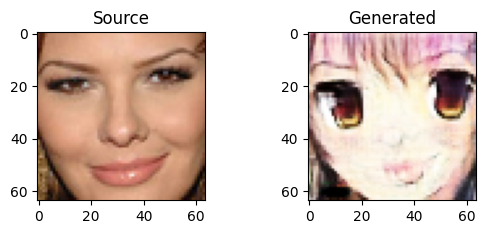

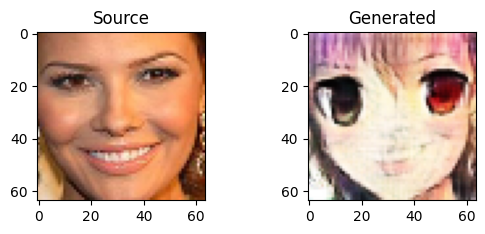

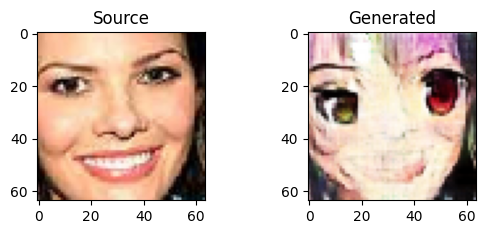

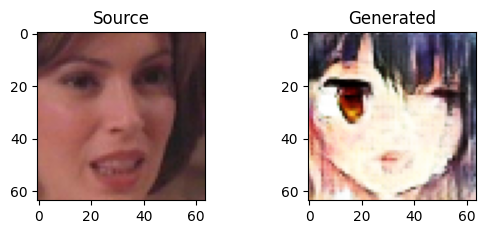

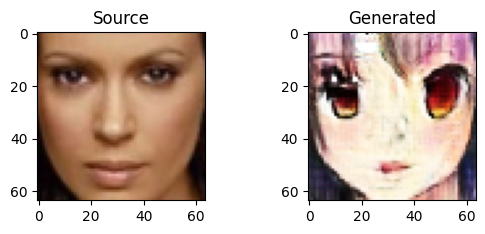

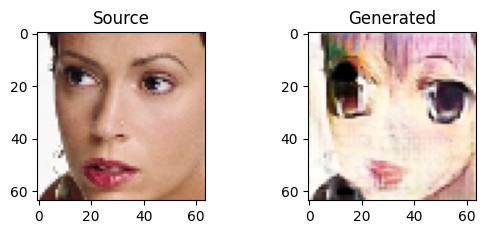

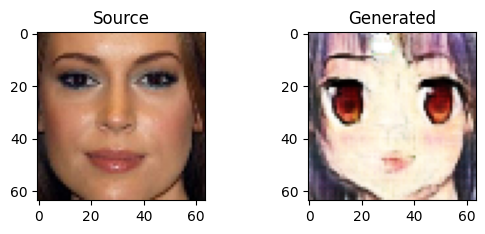

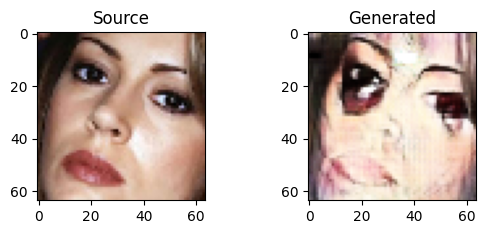

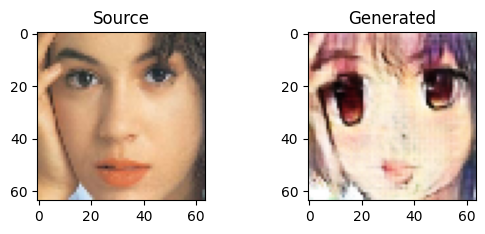

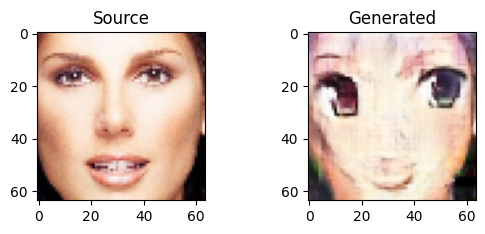

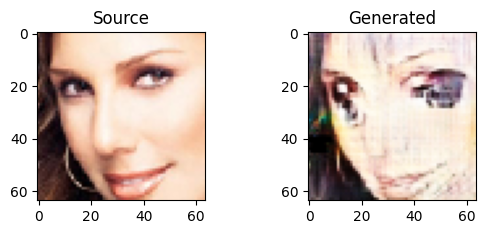

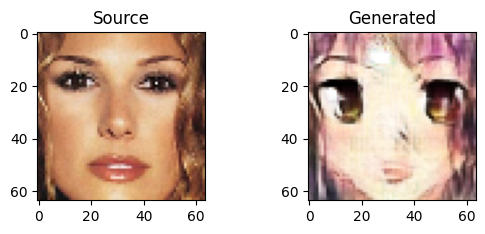

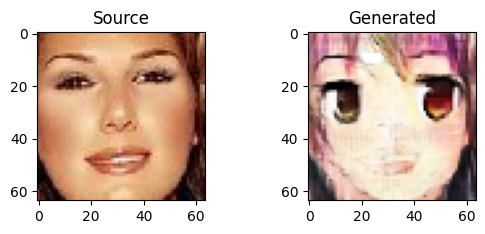

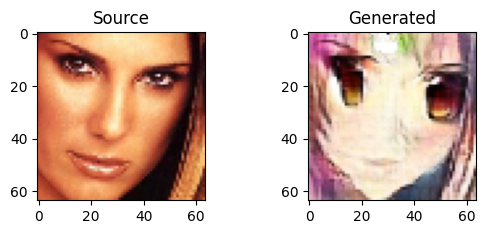

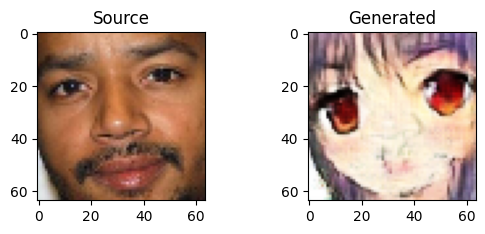

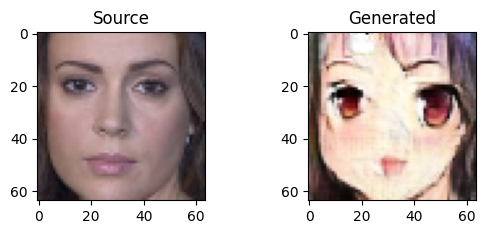

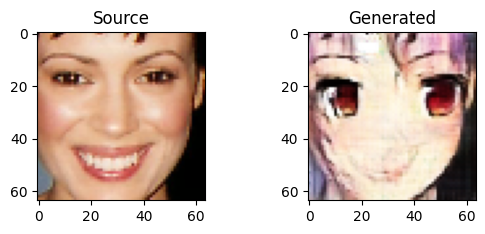

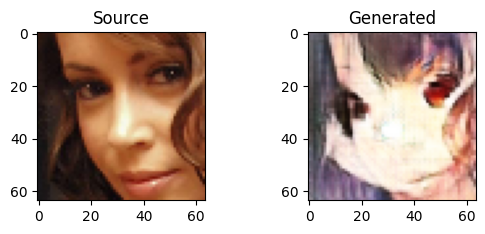

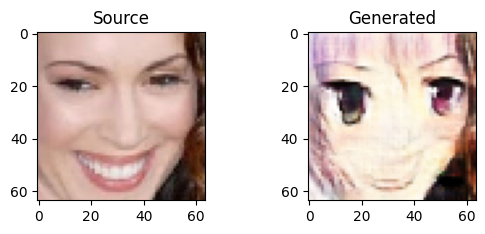

In [ ]:
generate_anime('/content/drive/MyDrive/Test images', direction='AB')